In [1]:
!pip install pygments

from pygments import highlight
from pygments.lexers import CLexer
from pygments.formatters import HtmlFormatter
from IPython.display import display, HTML

def pretty_print_c(code):
    lexer = CLexer()
    formatter = HtmlFormatter(style='colorful')
    html_code = highlight(code, lexer, formatter)
    display(HTML(html_code))

In [2]:
import os
import os.path as path
import sys

EXAMPLE_DIR = path.abspath("")
GIT_DIR = path.split(EXAMPLE_DIR)[0]
SRC_DIR = path.join(GIT_DIR, "src")
sys.path.append(SRC_DIR)

In [3]:
import fpcore
import lambdas

import matplotlib.pyplot as plt

from interval import Interval
from lambdas import *
from plot_lambda import plot_lambda
from compare_plot_lambda import compare_plot_lambda

In [4]:
from fpcore.interface import *
x = var("x")
dom = Interval("(- (/ PI 2))", "(/ PI 2)")
samples = 2**17
func = fpcore.parse("(FPCore (x) (sin x))")
terms = 12

2023-07-03 14:21:19.991112 result: Command: 'sollya --flush --warnonstderr query.sollya'
2023-07-03 14:21:19.991560 result: Query:

prec = 512!;
algo_analysis_bound = 9.5367431640625e-07;
I = [(-(pi/2));(pi/2)];
f = sin(x);
max_monomial = 9;
monomials = [|1, 3, 5, 7, 9|];
formats = [|double...|];
p = taylorform(f, max_monomial, I, absolute)[0];
display = hexadecimal!;
print("{");
print("  \"coefficients\" : [\""@coeff(p,1)@"\", \""@coeff(p,3)@"\", \""@coeff(p,5)@"\", \""@coeff(p,7)@"\", \""@coeff(p,9)@"\"]");
print("}");
quit;

2023-07-03 14:21:20.027489 result: stdout:

{
  "coefficients" : ["0x1p-1", "-0x1.55555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555556p-4", "0x1.11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111112p-8", "-0x1.a01a01a01a01a01a01a01a01a01a01a01a01a01a01a01a01a01a01a01a01a01a01a01a01a01a01a01a01a01a01a01a01a01a01a01

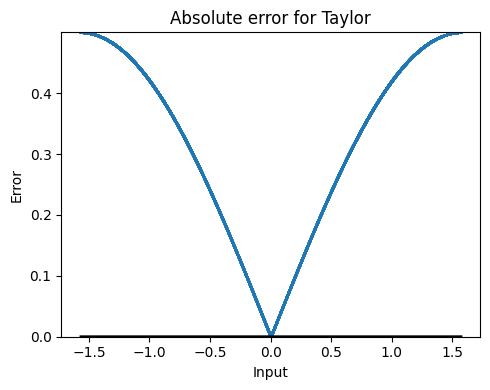

In [13]:
tayl = Horner(MinimaxPolynomial(func, dom, 5, "taylor"))

plot_lambda(dom, tayl, "Taylor", samples)
with open("lambda.c", "r") as f:
    pretty_print_c(f.read())


2023-07-03 13:57:38.872088 result: Used cache
2023-07-03 13:57:38.872175 result: Sollya time: 0.0001265419996343553 sec
2023-07-03 13:57:39.449521 result: Command: 'sollya --flush --warnonstderr query.sollya'
2023-07-03 13:57:39.449626 result: Query:

prec = 512!;
algo_analysis_bound = 9.5367431640625e-07;
I = [(-(pi/2));(pi/2)];
f = sin(x);
max_monomial = 23;
monomials = [|1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23|];
formats = [|double...|];
p = chebyshevform(f, max_monomial, I)[0];
display = hexadecimal!;
print("{");
print("  \"coefficients\" : [\""@coeff(p,1)@"\", \""@coeff(p,3)@"\", \""@coeff(p,5)@"\", \""@coeff(p,7)@"\", \""@coeff(p,9)@"\", \""@coeff(p,11)@"\", \""@coeff(p,13)@"\", \""@coeff(p,15)@"\", \""@coeff(p,17)@"\", \""@coeff(p,19)@"\", \""@coeff(p,21)@"\", \""@coeff(p,23)@"\"]");
print("}");
quit;

2023-07-03 13:57:39.475206 result: stdout:

{
  "coefficients" : ["0x1.ffffffffffffffffffffffc349304e9f65f2cfb82be155a1308eca85d8ea5a47882c05ad0a36240dc9a3f1236e5829011e22db33f5

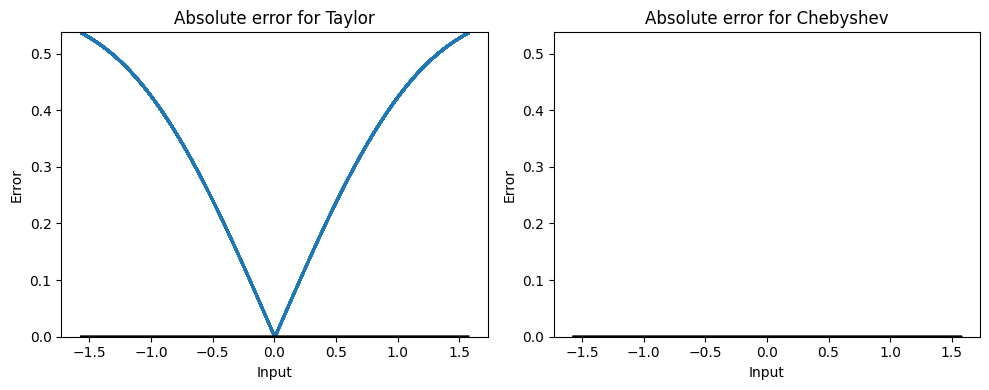

In [6]:
cheb = Horner(MinimaxPolynomial(func, dom, terms, "chebyshev"))

compare_plot_lambda(dom, tayl, cheb, "Taylor", "Chebyshev", samples)
with open("right.c", "r") as f:
    pretty_print_c(f.read())

2023-07-03 13:57:44.913550 result: Used cache
2023-07-03 13:57:44.913636 result: Sollya time: 0.0001288340426981449 sec
2023-07-03 13:57:45.492178 result: Command: 'sollya --flush --warnonstderr query.sollya'
2023-07-03 13:57:45.492248 result: Query:

prec = 512!;
algo_analysis_bound = 9.5367431640625e-07;
I = [(-(pi/2));(pi/2)];
f = sin(x);
max_monomial = 23;
monomials = [|1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23|];
formats = [|double...|];
p = remez(f, monomials, I);
display = hexadecimal!;
print("{");
print("  \"coefficients\" : [\""@coeff(p,1)@"\", \""@coeff(p,3)@"\", \""@coeff(p,5)@"\", \""@coeff(p,7)@"\", \""@coeff(p,9)@"\", \""@coeff(p,11)@"\", \""@coeff(p,13)@"\", \""@coeff(p,15)@"\", \""@coeff(p,17)@"\", \""@coeff(p,19)@"\", \""@coeff(p,21)@"\", \""@coeff(p,23)@"\"]");
print("}");
quit;

2023-07-03 13:57:46.130286 result: stdout:

{
  "coefficients" : ["0x1.fffffffffffffffffffffd0af7b9bca58218e414b40acd3f55f8f75f46b876a03e8c41a69813afcc8509a33def9ed7e5fa4ae0ad0421d088f5c29d14

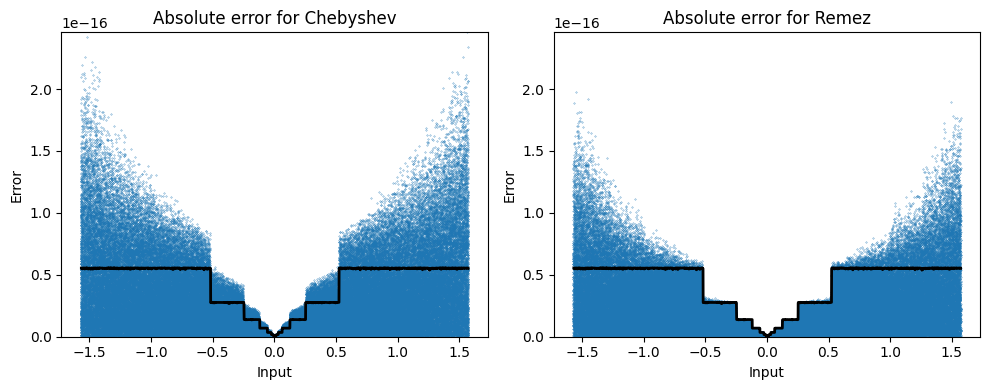

In [7]:
remez = Horner(MinimaxPolynomial(func, dom, terms, "remez"), split=1)

compare_plot_lambda(dom, cheb, remez, "Chebyshev", "Remez", samples)
with open("right.c", "r") as f:
    pretty_print_c(f.read())

2023-07-03 13:57:51.719986 result: Used cache
2023-07-03 13:57:51.720073 result: Sollya time: 0.0001259999698959291 sec
2023-07-03 13:57:52.294711 result: Command: 'sollya --flush --warnonstderr query.sollya'
2023-07-03 13:57:52.294778 result: Query:

prec = 512!;
algo_analysis_bound = 9.5367431640625e-07;
I = [(-(pi/2));(pi/2)];
f = sin(x);
max_monomial = 23;
monomials = [|1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23|];
formats = [|double...|];
p = fpminimax(f, monomials, formats, I, floating, absolute);
display = hexadecimal!;
print("{");
print("  \"coefficients\" : [\""@coeff(p,1)@"\", \""@coeff(p,3)@"\", \""@coeff(p,5)@"\", \""@coeff(p,7)@"\", \""@coeff(p,9)@"\", \""@coeff(p,11)@"\", \""@coeff(p,13)@"\", \""@coeff(p,15)@"\", \""@coeff(p,17)@"\", \""@coeff(p,19)@"\", \""@coeff(p,21)@"\", \""@coeff(p,23)@"\"]");
print("}");
quit;

2023-07-03 13:57:53.003096 result: stdout:

{
  "coefficients" : ["0x1p0", "-0x1.5555555555555p-3", "0x1.11111111110cep-7", "-0x1.a01a01a014cdcp-13", "0x1.71d

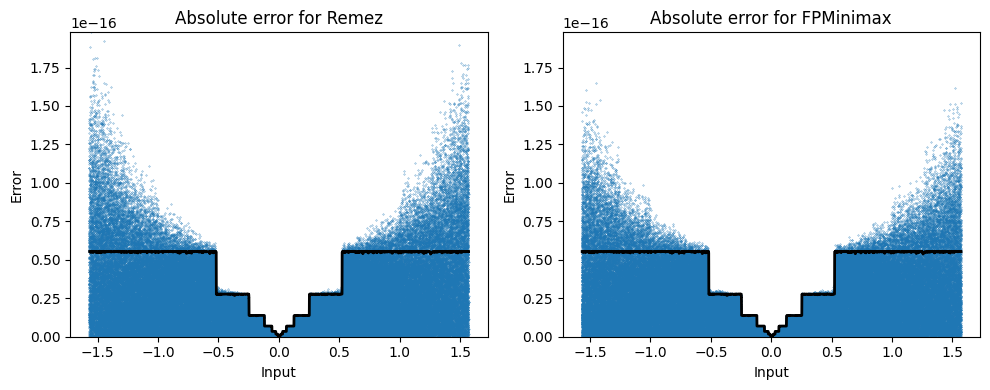

In [8]:
fpmi = Horner(MinimaxPolynomial(func, dom, terms, "fpminimax"), 1)

compare_plot_lambda(dom, remez, fpmi, "Remez", "FPMinimax", samples)
with open("right.c", "r") as f:
    print(f.read())